In [1]:
import os
import pandas as pd
import re
import sys
import stanza
from collections import Counter
import pickle
from bs4 import BeautifulSoup
import statistics
directory_1 = r'..\LaD\Corpora\dpc1.0p2\data\html\journ'


In [2]:
language = 'nl'
stanza.download(language)
nlp = stanza.Pipeline(language)

2024-11-27 21:08:34 INFO: Downloaded file to C:\Users\Ino\stanza_resources\resources.json
2024-11-27 21:08:34 INFO: Downloading default packages for language: nl (Dutch) ...
2024-11-27 21:08:34 INFO: File exists: C:\Users\Ino\stanza_resources\nl\default.zip
2024-11-27 21:08:36 INFO: Finished downloading models and saved to C:\Users\Ino\stanza_resources
2024-11-27 21:08:36 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-11-27 21:08:36 INFO: Downloaded file to C:\Users\Ino\stanza_resources\resources.json
2024-11-27 21:08:37 INFO: Loading these models for language: nl (Dutch):
| Processor | Package         |
-------------------------------
| tokenize  | alpino          |
| mwt       | alpino          |
| pos       | alpino_charlm   |
| lemma     | alpino_nocharlm |
| depparse  | alpino_charlm   |
| ner       | conll02         |

2024-11-27 21:08:37 INFO: Using device: cpu
2024-11-27 21:08:37 INFO: Loading: tokenize
C:\Users\Ino\anaconda3\envs\LaD\lib\site-packages\stanza\models\tokenization\trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_on

In [3]:
lines = []

for dir in os.listdir(directory_1):
    dir_in_directory = os.listdir(directory_1+"\\"+dir)
    for file in dir_in_directory:
        with open(directory_1+"\\"+dir+"\\"+file,'r',encoding = 'utf-8') as infile:
            content = infile.read()
            parser_content = BeautifulSoup(content, 'html5lib')
            html_text = parser_content.get_text()
            text_with_newlines = re.sub('\[.*','',html_text)
            text_elements = re.split(r'[\n]+', text_with_newlines)
            
            for entry in text_elements:
                if len(entry.split(' '))>1:
                    lines.append(entry)
        


In [4]:
pairs = []
for line in lines:
    # print(line)
    splitted_line = re.split(r'\""',line)
    if len(splitted_line)==2:
        # if len(splitted_line[0])>6 and len(splitted_line[1])>6: 
        pairs.append(splitted_line)
        
        

In [5]:
corpus_df = pd.DataFrame(columns=["Dutch_Sentence", "English_Sentence", "Dutch Sentence Length","English Sentence Length","Dutch Type-Token Ratio","English Type-Token Ratio"])
list_dutch_sentences = []
list_english_sentences = []
processed_dutch_sentences = []
processed_english_sentences = []
i=0
for pair in pairs:
    
    dutch_sentence = pair[0]
    dutch_sentence = re.sub(r'\'|\"','',dutch_sentence)
    
    english_sentence = pair[1]
    english_sentence = re.sub(r'\'|\"','',english_sentence)
    if english_sentence == dutch_sentence:
        continue
    
    processed_dutch_sentence = nlp.process(dutch_sentence)
    processed_english_sentence = nlp.process(english_sentence)
    
    processed_dutch_sentences.append(processed_dutch_sentence)
    processed_english_sentences.append(processed_english_sentence)
    

  
    
    dutch_sentence_length = len(dutch_sentence.split(' '))
    english_sentence_length = len(english_sentence.split(' '))
    
    list_dutch_sentences.append(dutch_sentence)
    list_english_sentences.append(english_sentence)
    
    corpus_df.loc[i] = [dutch_sentence,english_sentence,dutch_sentence_length,english_sentence_length,0,0]
    i+=1

In [6]:
corpus_df


,Dutch_Sentence,English_Sentence,Dutch Sentence Length,English Sentence Length,Dutch Type-Token Ratio,English Type-Token Ratio
0,Veel Afrikaanse vrouwen gaan naar huis met een...,"Many African women return home with a fistula,...",12,12,0,0
1,Beschouw ons niet als de moppentrommel van de ...,Do not consider us as the joke bin of the univ...,9,11,0,0
2,Er is al een patiëntje geholpen met onze techniek,Our technique has already helped a patient,9,7,0,0
3,De schedelcontouren worden uit de data van de ...,The cranial contours are filtered from the sca...,17,17,0,0
4,Nadat we voor die schedels de computerprocedur...,After we ran the computerized procedure for th...,38,40,0,0
...,...,...,...,...,...,...
310,Ik werk er mee aan een Europees actieplan voor...,I am working on a European action plan for tel...,20,19,0,0
311,Nederland is in de eerste plaats een groot lab...,"The Netherlands is, first and foremost, a huge...",12,14,0,0
312,Wij zijn als het ware het oog en oor van Vlaan...,In a sense were the eyes and ears of Flanders ...,14,11,0,0
313,De Nederlandse staatsveiligheid kon zich niet ...,The Dutch State Security Service couldnt belie...,15,16,0,0


In [8]:
#idiom_pairs = mt_list
filename ='.\Corpora\idiom_pairs.txt'
with open(filename, 'r') as infile:
    idiom_pairs = infile.read()
    idiom_pairs = idiom_pairs.split("], [")
filename ='.\Corpora\diminutive_pairs.txt'
with open(filename, 'r') as infile:
    diminutive_pairs = infile.read()
    diminutive_pairs = diminutive_pairs.split("], [")
filename ='.\Corpora\modal_particles_pairs.txt'
with open(filename, 'r') as infile:
    modal_particles_pairs = infile.read()
    modal_particles_pairs = modal_particles_pairs.split("], [")

synthethic_pairs = []
# print(type(idiom_pairs))
for pair in idiom_pairs:
    synthethic_pairs = synthethic_pairs + [pair]
for pair in diminutive_pairs:
    # synthethic_pairs.append(pair)
    synthethic_pairs = synthethic_pairs + [pair]
for pair in modal_particles_pairs:
    # synthethic_pairs.append(pair)
    synthethic_pairs = synthethic_pairs + [pair]
    

synthetic_df = pd.DataFrame(columns=["Dutch_Sentence", "English_Sentence", "Dutch Sentence Length","English Sentence Length","Dutch Type-Token Ratio","English Type-Token Ratio"])
i=315
for pair in synthethic_pairs:
    if '[[' in pair:
        pair = pair.replace('[[','')
    if ']]' in pair:
        pair = pair.replace(']]','')
    # print(pair)

    pair = re.split("\', '|\", \"|\', \"", pair)
    dutch_sentence = pair[0]
    dutch_sentence = re.sub(r'\'|\"','',dutch_sentence)
    
    english_sentence = pair[1]
    english_sentence = re.sub(r'\'|\"','',english_sentence)

    if english_sentence == dutch_sentence:
        continue
    dutch_sentence_length = len(dutch_sentence.split(' '))
    english_sentence_length = len(english_sentence.split(' '))
    
    processed_dutch_sentences.append(nlp.process(dutch_sentence))
    processed_english_sentences.append(nlp.process(english_sentence))
    list_dutch_sentences.append(dutch_sentence)
    list_english_sentences.append(english_sentence)
    
    synthetic_df.loc[i] = [dutch_sentence,english_sentence,dutch_sentence_length,english_sentence_length,0,0]
    i+=1

In [9]:
corpus_df = pd.concat([corpus_df,synthetic_df])

In [10]:
corpus_df.to_pickle('.\Corpora\corpus_df.pkl')

In [11]:

# dutch_ttr = []
# dutch_avg_sentence_len = []
# token_frequencies_dutch = Counter()
# english_ttr = []
# english_avg_sentence_len = []
# token_frequencies_english = Counter()

# for article in processed_dutch_sentences:    # Calculate TTR
    
    
#     for sentence in article.sentences:
#         all_tokens =[token.text for token in sentence.tokens]
#         token_frequencies_dutch.update(all_tokens)

#     num_types = len(token_frequencies_dutch.keys())
#     num_tokens = sum(token_frequencies_dutch.values())
#     tt_ratio = num_types/float(num_tokens)
#     dutch_ttr.append(tt_ratio)

 
   

# for article in processed_english_sentences:    # Calculate TTR
        
#     for sentence in article.sentences:
#         all_tokens =[token.text for token in sentence.tokens]
#         token_frequencies_english.update(all_tokens)

#     num_types = len(token_frequencies_english.keys())
#     num_tokens = sum(token_frequencies_english.values())
#     tt_ratio = num_types/float(num_tokens)
#     english_ttr.append(tt_ratio)


    
 

In [12]:
# print(dutch_ttr)

In [13]:
# print(english_ttr)


In [14]:
# for pair in pairs:
#     print(pair,'\n')

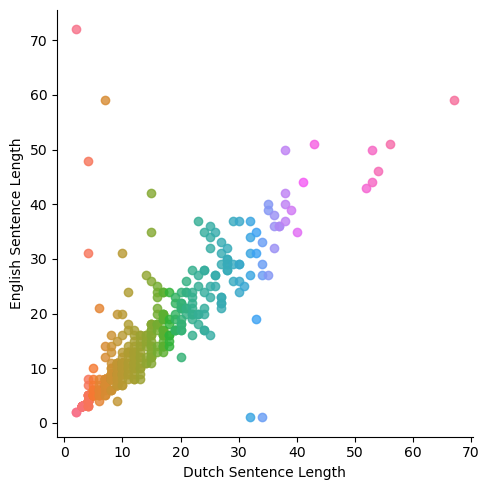

In [15]:
import matplotlib.pyplot as plt
import seaborn as sb
plot = sb.lmplot(corpus_df, x="Dutch Sentence Length", y="English Sentence Length",hue='Dutch Sentence Length',legend = False, fit_reg=False)
plot.savefig('./sentence_length.png')

In [16]:
corpus_df.describe()


,Dutch Sentence Length,English Sentence Length,Dutch Type-Token Ratio,English Type-Token Ratio
count,393.000000,393.000000,393.0,393.0
mean,15.320611,16.213740,0.0,0.0
std,10.402316,11.233837,0.0,0.0
min,2.000000,1.000000,0.0,0.0
25%,8.000000,8.000000,0.0,0.0
50%,12.000000,13.000000,0.0,0.0
75%,20.000000,21.000000,0.0,0.0
max,67.000000,72.000000,0.0,0.0


In [17]:
modal_particles = ['maar','toch','nou','wel','even','eens','gewoon','misschien','soms']
# pattern = 'eens'
count_particle = []
containing_pattern = []
for sentence in list_dutch_sentences:
    for particle in modal_particles:
        if particle in sentence:
            containing_pattern.append(sentence)
            count_particle.append(particle)
    

In [18]:
print(len(containing_pattern))
print(len(count_particle))

125
125


In [19]:
from collections import Counter
counts_particle = Counter(count_particle)
counts_label = counts_particle.keys()


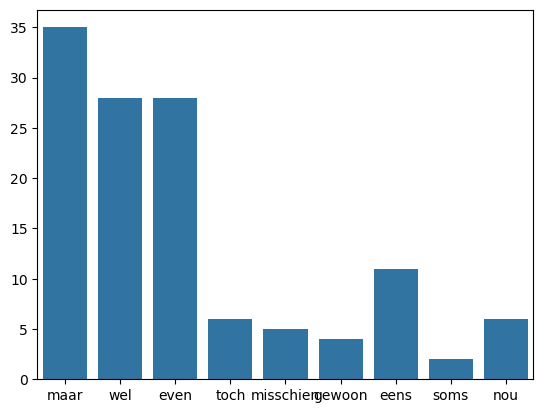

In [29]:
plot2 =sb.barplot(counts_particle)


In [21]:
diminutives = ['tje','pje','kje','je','etje']

count_diminutives = []
diminutive_sentences = []
containing_diminutives = []
for sentence in list_dutch_sentences:
    for diminutive in diminutives:
        if diminutive in sentence:
            containing_diminutives.append(sentence)
            count_diminutives.append(diminutive)
            

counts_diminutives = Counter(count_diminutives)


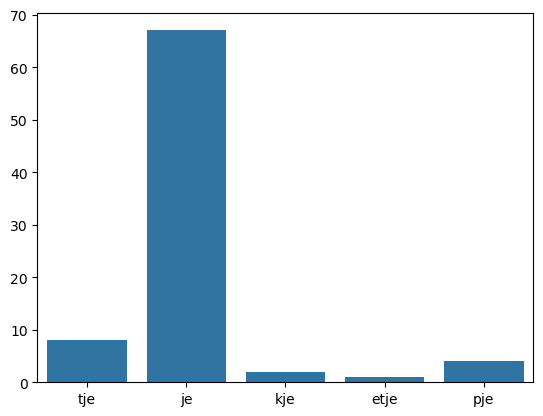

In [22]:
plot3 = sb.barplot(counts_diminutives)


In [23]:
# print(containing_diminutives)

In [24]:
#diminutives_without_je = counts_diminutives.pop('je')
